In [1]:
import tensorflow as tf
import keras

In [47]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
import cv2
import numpy as np

In [4]:
def increaseDim(data):
    data2 = np.empty((0, 227, 227, 3))
    for im in data:
        im1 =  cv2.resize(im, (227,227))
        data2 = np.append(data2, [im1], axis=0)

    print(data2.shape)
    return data2

In [48]:
x_train = x_train/255.0
x_test = x_test/255.0

In [49]:
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [55]:
model2 = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3 )),
    keras.layers.Conv2D(filters = 96, kernel_size=(11,11), strides=4, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=2),
    keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=2),
    keras.layers.Conv2D(filters = 384, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.Conv2D(filters = 384, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dense(10, activation="softmax") 
])

ValueError: Exception encountered when calling layer "max_pooling2d_7" (type MaxPooling2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node max_pooling2d_7/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 3, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,2,2,256].

Call arguments received by layer "max_pooling2d_7" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 256), dtype=float32)

In [56]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 384)      

In [53]:
earlyStop = tf.keras.callbacks.EarlyStopping(min_delta = 0.01, monitor='loss', patience=4, verbose=True, restore_best_weights=True, start_from_epoch= 5)

In [54]:
model2.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=True, callbacks=[earlyStop])

Epoch 1/50


ValueError: in user code:

    File "C:\Users\dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dell\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(32, 32, 32, 3)


In [41]:
import matplotlib.pyplot as plt
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

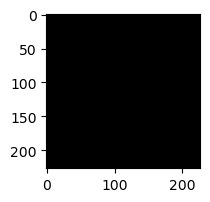

In [44]:
plot_sample(x_train_s, y_train, 3)

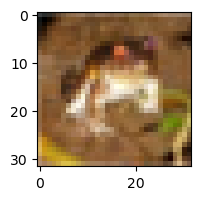

In [45]:
plot_sample(x_train, y_train, 0)